# Minneapolis College Library Springshare Data Analysis
# Asset Views 
## William Vann
## Information Studies Faculty
## Summer 2023

An "asset" is a library resource that's linked to in the SpringShare ecosystem. 
There are 4 categories of assets: 
1. [x] Book
2. [x] Link
3. [x] Database
4. Document

This analysis will concern itself with 1-3 only. 

In [1]:
# Import dependencies

from datetime import datetime as dt
from scipy import stats as st

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
def num_wanted():
    try:
        top_num_wanted = int(input("Enter number wanted: "))
             
    except:
        print("Incorrect input ... provide an integer.")
        
    return top_num_wanted

In [3]:
assets_df = pd.read_csv("assets_alltime.csv")
assets_df = assets_df[["ID", "Name", "Type", "Total"]]
assets_df = assets_df.loc[(assets_df["Name"] != "[Deleted]"), :]

assets_df = assets_df.sort_values(by="Total", ascending=False)
assets_df = assets_df.reset_index(drop=True)
assets_df

,ID,Name,Type,Total
0,3361065,Academic Search Premier (EBSCO),Database,25942
1,3361083,CINAHL Ultimate (EBSCO),Database,6432
2,3361103,Gale Ebooks (Virtual Reference Library),Database,5387
3,3361091,CQ Researcher,Database,4319
4,3361124,MasterFILE Complete (EBSCO),Database,3576
...,...,...,...,...
1143,70067705,National Archives: Analyze a Photograph,Link,1
1144,8295358,NIDAMED Clinical Resources,Link,1
1145,7038461,More FRONTLINE,Link,1
1146,50906115,Minnesota.gov Portal,Link,1


In [4]:
assets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      1148 non-null   int64 
 1   Name    1148 non-null   object
 2   Type    1148 non-null   object
 3   Total   1148 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 36.0+ KB


In [5]:
assets_total = assets_df.shape[0]
highest_views = assets_df.iloc[0, -1]
lowest_views = assets_df.iloc[-1, -1]

print(f"{assets_total} assets total, ranging from {lowest_views} to {highest_views} accesses.")

1148 assets total, ranging from 1 to 25942 accesses.


In [6]:
num_leaders = num_wanted()

leaders = assets_df.sort_values(by="Total", ascending=False).head(num_leaders)
leaders = leaders.sort_values(by="Total", ascending=True)

leaders = leaders.reset_index(drop=True)

leaders

Enter number wanted: 25


,ID,Name,Type,Total
0,3361112,Health Source: Nursing/Academic Edition (EBSCO),Database,688
1,3361098,ERIC (Education Resource Information Center) (...,Database,695
2,10410784,LearningExpress Library,Database,713
3,20439402,EasyBib MLA Citation Guides,Link,725
4,3361095,Ebook Central (ProQuest),Database,746
5,3361102,Films on Demand (Infobase),Database,761
6,3361066,Access Science,Database,805
7,3361093,Credo Reference,Database,809
8,3361106,Global Issues (Gale In Context),Database,829
9,3361121,"Library, Information Science & Technology Abst...",Database,871


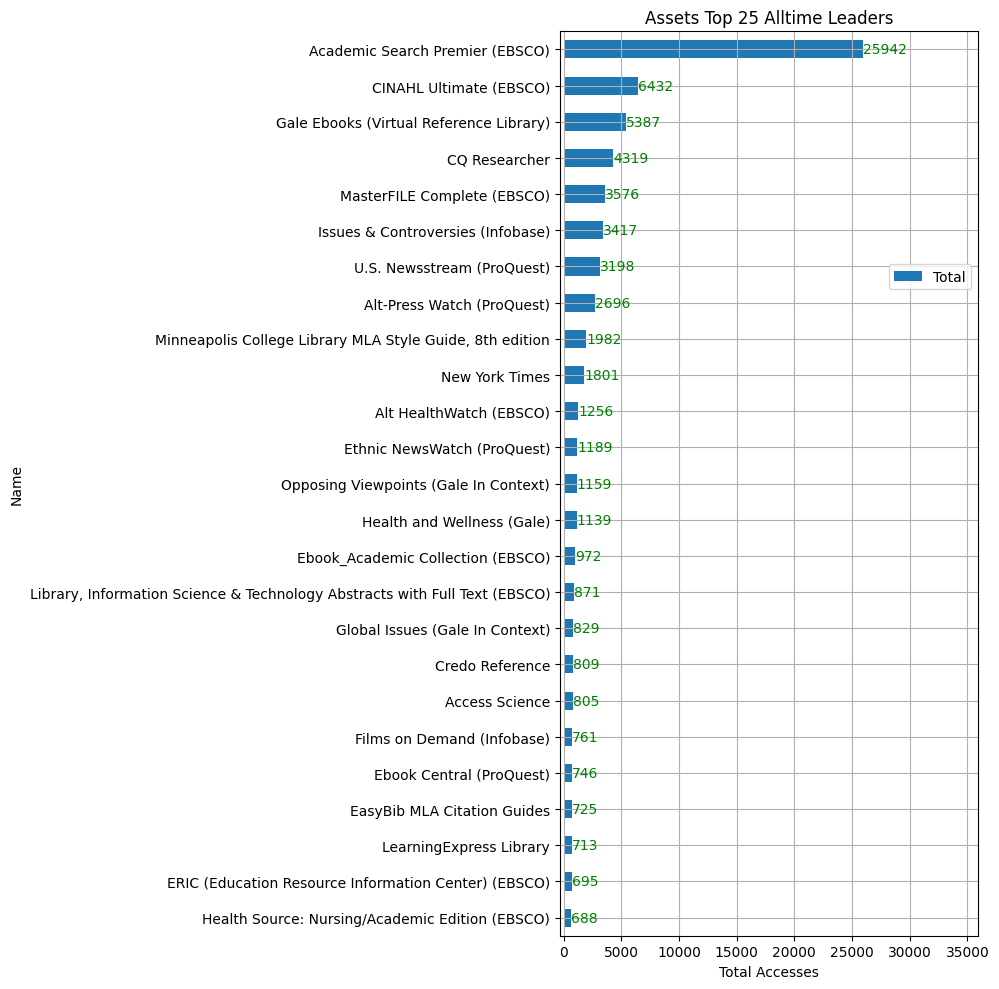

In [7]:
ax = leaders.plot(
        x="Name", 
        y="Total", 
        figsize=(10,10),
        kind="barh", 
        grid=True, 
        xlim=[leaders["Total"].min()-1000, leaders["Total"].max()+10000],
        xlabel="Total Accesses",
        title=f"Assets Top {num_leaders} Alltime Leaders")

ax.bar_label(ax.containers[0], color="green")
ax.legend(loc="best", bbox_to_anchor=(0.5, 0.25, 0.5, 0.5))
plt.tight_layout()

plt.savefig(f"Assets/assets_{num_leaders}.png")

plt.show()

In [8]:
num_leaders = num_wanted()

book_leaders = assets_df.loc[(assets_df["Type"]=="Book"), :].sort_values(by="Total", ascending=False).head(num_leaders)
book_leaders = book_leaders.sort_values(by="Total", ascending=True).reset_index(drop=True)

book_leaders

Enter number wanted: 25


,ID,Name,Type,Total
0,8425558,Crowley's an Introduction to Human Disease,Book,42
1,4955912,Encyclopedia of Sociology,Book,43
2,57917020,Nursing Care Planning Made Incredibly Easy!,Book,44
3,3361684,Salem Health: Infectious Diseases and Conditio...,Book,46
4,20407948,"MLA Handbook, 8th Edition",Book,54
5,24974234,All-In-One Nursing Care Planning Resource,Book,55
6,55570344,Mosby's Guide to Nursing Diagnosis,Book,55
7,5090986,Gender and Education : An Encyclopedia,Book,56
8,3361686,"Infectious Diseases, 2nd Ed.",Book,61
9,46366881,African Americans at Risk,Book,62


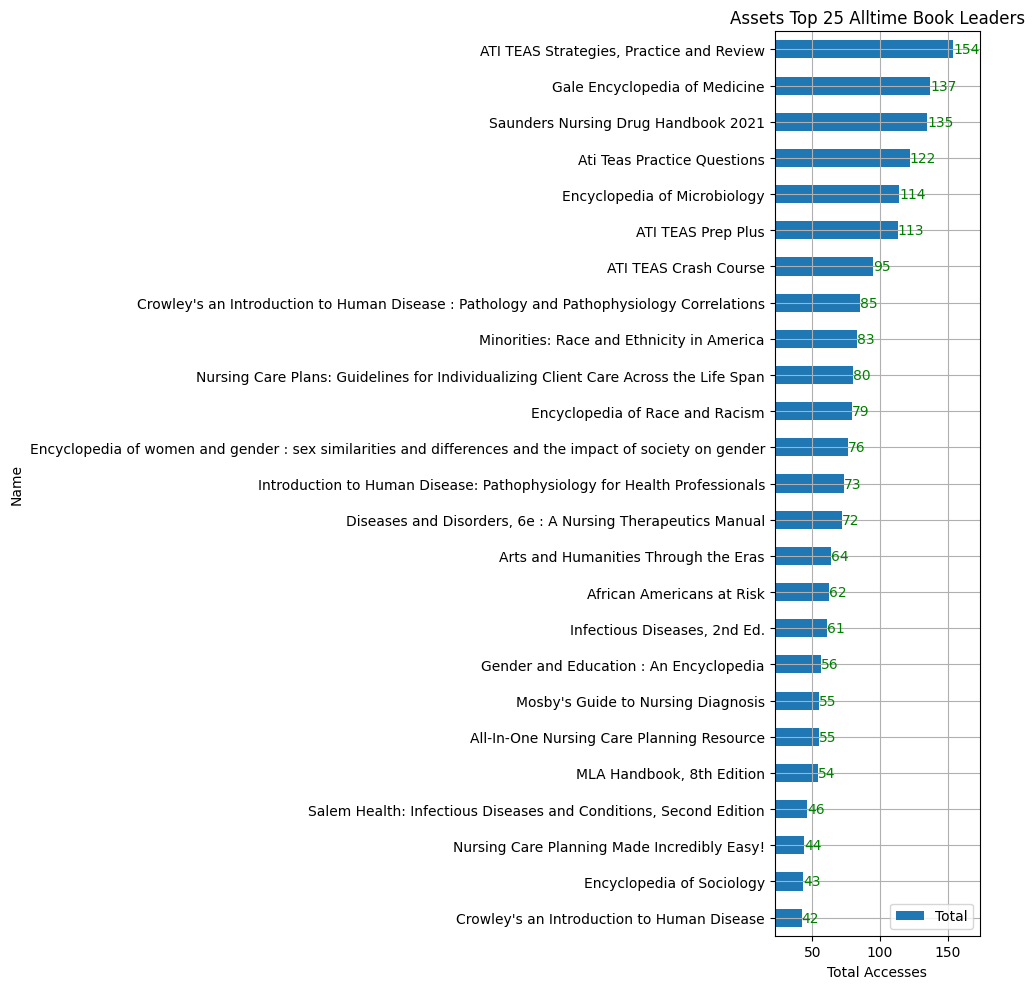

In [9]:
ax = book_leaders.plot(
        x="Name", 
        y="Total", 
        figsize=(10,10),
        kind="barh", 
        grid=True, 
        xlim=[book_leaders["Total"].min()-20, book_leaders["Total"].max()+20],
        xlabel="Total Accesses",
        title=f"Assets Top {num_leaders} Alltime Book Leaders")

ax.bar_label(ax.containers[0], color="green")
plt.tight_layout()

plt.savefig(f"Assets/book_assets_{num_leaders}.png")

plt.show()

In [10]:
num_leaders = num_wanted()

link_leaders = assets_df.loc[(assets_df["Type"]=="Link"), :].sort_values(by="Total", ascending=False).head(num_leaders)
link_leaders = link_leaders.sort_values(by="Total", ascending=True).reset_index(drop=True)

link_leaders

Enter number wanted: 25


,ID,Name,Type,Total
0,54933110,Nursing Assistant/Nurse Aide Tests,Link,34
1,66379075,TEAS Test Review Guide,Link,36
2,46841420,Gender Blog Custom Search Engine,Link,39
3,3361938,Academic Search Premier: Guide to Finding Scho...,Link,40
4,18970578,Nursing,Link,41
5,50529074,Microbiology Subject Guide in AccessScience,Link,52
6,20407985,APA Style and Grammar Guidelines,Link,72
7,20407983,American Psychological Association,Link,73
8,20407991,Purdue OWL: Reference List Basics,Link,96
9,39844473,CINAHL Ultimate,Link,97


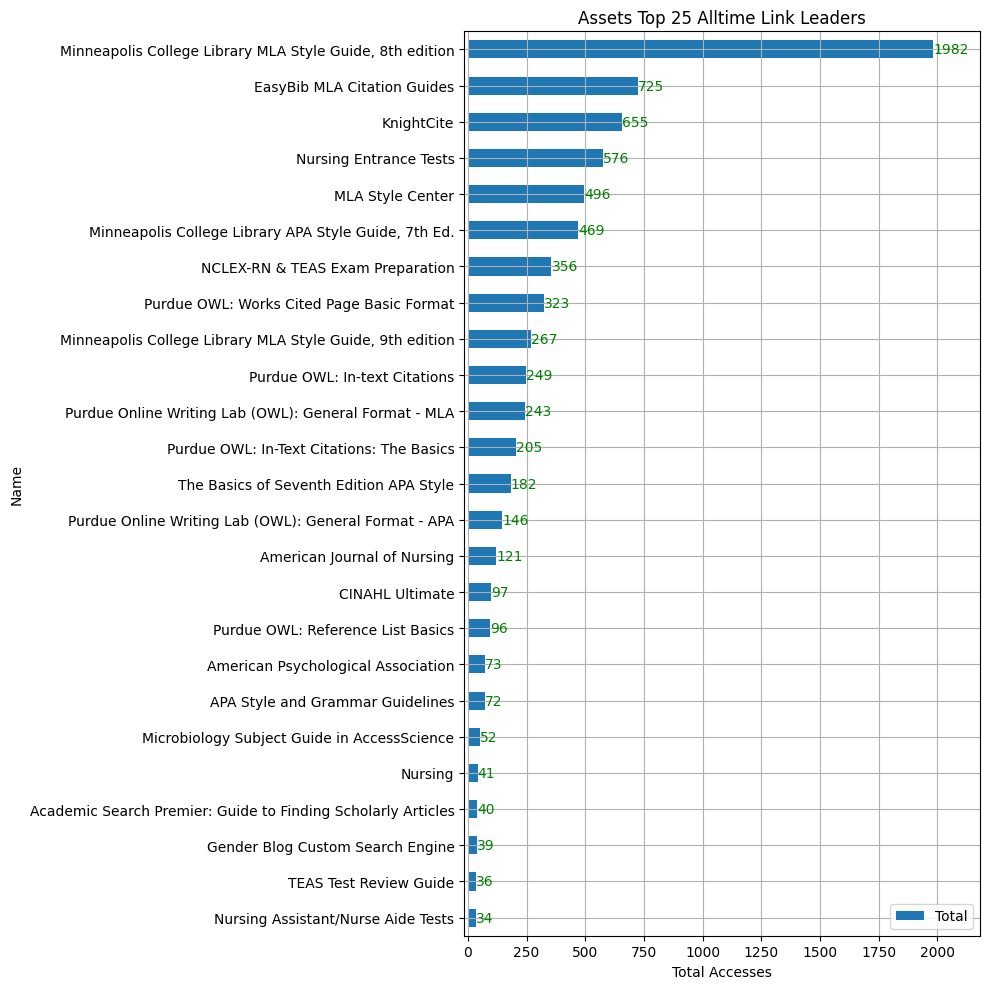

In [11]:
ax = link_leaders.plot(
        x="Name", 
        y="Total", 
        figsize=(10,10),
        kind="barh", 
        grid=True, 
        xlim=[link_leaders["Total"].min()-50, link_leaders["Total"].max()+200],
        xlabel="Total Accesses",
        title=f"Assets Top {num_leaders} Alltime Link Leaders")

ax.bar_label(ax.containers[0], color="green")
plt.tight_layout()

plt.savefig(f"Assets/link_assets_{num_leaders}.png")

plt.show()

In [12]:
num_leaders = num_wanted()

database_leaders = assets_df.loc[(assets_df["Type"]=="Database"), :].sort_values(by="Total", ascending=False).head(num_leaders)
database_leaders = database_leaders.sort_values(by="Total", ascending=True).reset_index(drop=True)

database_leaders

Enter number wanted: 25


,ID,Name,Type,Total
0,3361064,ABC/CLIO/Greenwood E-books,Database,662
1,3361125,MegaFILE (EBSCO),Database,687
2,3361112,Health Source: Nursing/Academic Edition (EBSCO),Database,688
3,3361098,ERIC (Education Resource Information Center) (...,Database,695
4,10410784,LearningExpress Library,Database,713
5,3361095,Ebook Central (ProQuest),Database,746
6,3361102,Films on Demand (Infobase),Database,761
7,3361066,Access Science,Database,805
8,3361093,Credo Reference,Database,809
9,3361106,Global Issues (Gale In Context),Database,829


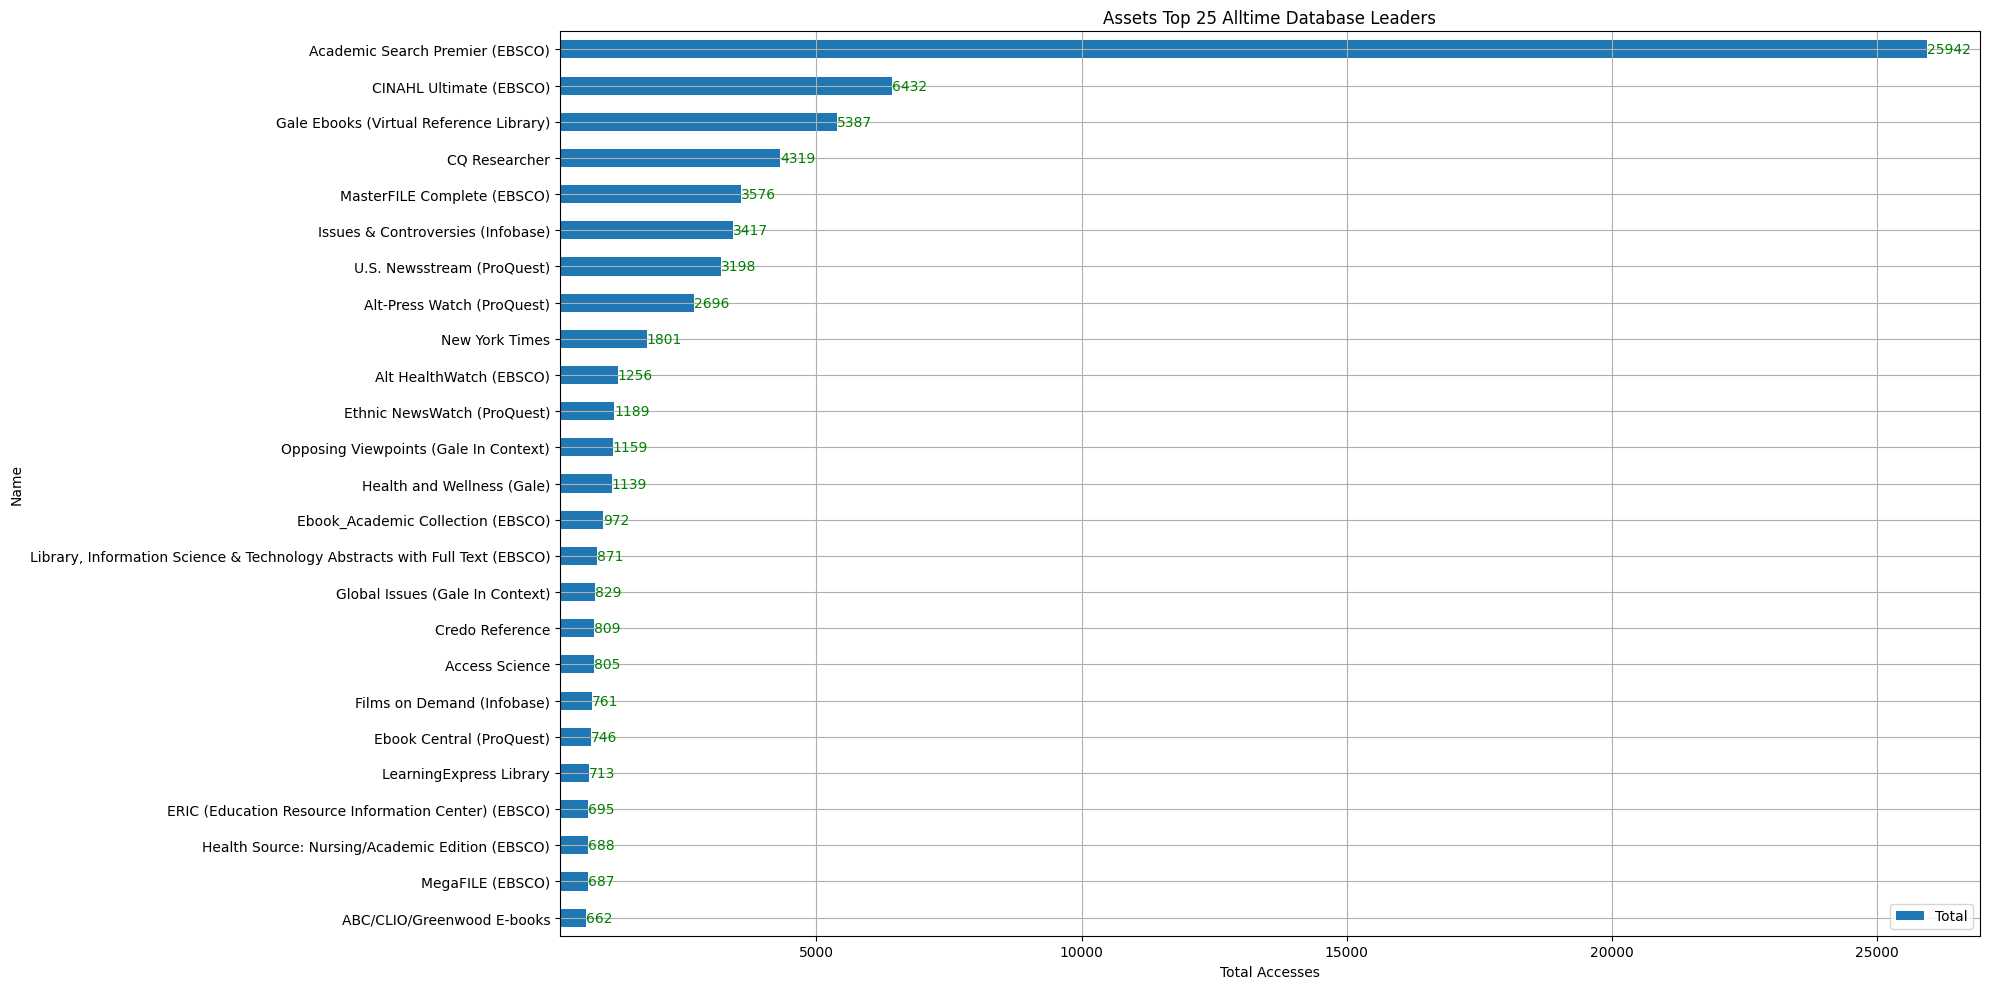

In [13]:
ax = database_leaders.plot(
        x="Name", 
        y="Total", 
        figsize=(20,10),
        kind="barh", 
        grid=True, 
        xlim=[database_leaders["Total"].min()-500, database_leaders["Total"].max()+1000],
        xlabel="Total Accesses",
        title=f"Assets Top {num_leaders} Alltime Database Leaders")

ax.bar_label(ax.containers[0], color="green")
plt.tight_layout()

plt.savefig(f"Assets/db_assets_{num_leaders}.png")

plt.show()

In [14]:
print(f'Mean of Asset Views: {assets_df["Total"].mean()}') 
print(f'Median of Asset Views: {assets_df["Total"].median()}') 
print(f'Mode of Asset Views: {st.mode(assets_df["Total"], axis=None, keepdims=False)}') 

print(f'Min of Asset Views: {assets_df["Total"].min()}') 
print(f'Max of Asset Views: {assets_df["Total"].max()}') 

Mean of Asset Views: 90.2726480836237
Median of Asset Views: 3.0
Mode of Asset Views: ModeResult(mode=1, count=349)
Min of Asset Views: 1
Max of Asset Views: 25942
